#Machine Failure - Binary Classification

##Project Description

### **Problem:**
In the production process, machine failures can lead to production interruptions, resulting in financial losses amounting to millions of dollars, depending on the machine and the industry. Therefore, predicting machine failures in advance can help minimize downtime, reduce costs, and enable proactive maintenance strategies, ultimately improving overall operational efficiency.

###**Project Objective:**
Given the machine's conditions and features, the objective is to predict machine failures before they occur. This will enable proactive maintenance, minimize downtime, and optimize production efficiency.

###**Data:**
Each instance in the dataset represents a single observation of a machine during a production process, capturing its operational conditions, product characteristics, and failure status at a specific point in time. The dataset includes the following features:

**UID:** A unique identifier assigned to each observation, ranging from 1 to 10,000.

**Product ID:** A combination of a letter (L, M, or H) representing product quality variants—Low (50% of all products), Medium (30%), and High (20%)—followed by a variant-specific serial number.

**Type:** The extracted product quality category (L, M, or H) from the Product ID.

**Air Temperature [K]:** The ambient temperature around the machine, simulated using a random walk process and normalized to a standard deviation of 2 K around 300 K.

**Process Temperature [K]:** The temperature within the machine's process, calculated as air temperature plus 10 K, with additional random walk noise normalized to a standard deviation of 1 K.

**Rotational Speed [rpm]:** The machine's rotational speed, computed based on a power output of 2860 W, with normally distributed noise added.

**Torque [Nm]:** The torque applied during operation, normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring no negative values.

**Tool Wear [min]:** The amount of wear accumulated on the tool, determined by the product quality variant—H, M, and L add 5, 3, and 2 minutes of wear, respectively.

**Machine Failure:** A binary label indicating whether a machine failure occurred at this specific observation due to any of the predefined failure modes.

Each row in the dataset corresponds to a single timestamped record of a machine’s status, including its operating conditions and whether it experienced a failure.

> *This dataset is part of the following publication: S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.*

The data source link: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/data

##import libraries and define functions

In [ ]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Drive connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python "/content/drive/MyDrive/Colab Notebooks/Desiré/eda_utils.py"
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Desiré/')
import eda_utils
from eda_utils import *

In [ ]:
help(eda_utils.split_feature_cols)

Help on function split_feature_cols in module eda:

split_feature_cols(df, id_cols, target_col=None)
    Split dataframe into features and target, and further separate numeric and categorical features.
    
    Parameters:
    - df: Input DataFrame
    - id_cols: Number of ID columns to drop from the left (default 2)
    - target_col: Name of the target column (defaults to last column if None)
    
    Returns:
    - feature_df: DataFrame with only feature columns
    - target_col: Series with target values
    - num_cols: List of numeric column names
    - cat_cols: List of categorical column names
    - feature_cols: List of all feature column names



##import data / data structure

In [ ]:
#Data import form drive
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/project_dataset/Machine failure.csv')
#display the data
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
#dataset for binary clasification
df_maintenance = df.drop(['TWF','HDF','PWF', 'OSF', 'RNF'], axis=1)
df_maintenance.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [ ]:
df_maintenance.shape

(10000, 9)

In [ ]:
df_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [ ]:
#feature descriptions
df_maintenance.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
target_col='Machine failure'
feature_df, features_target_df, num_cols, cat_cols, feature_cols = split_feature_cols(df_maintenance, id_cols=2, target_col=target_col)

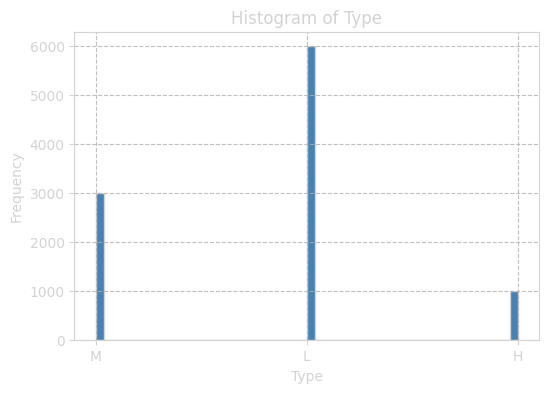

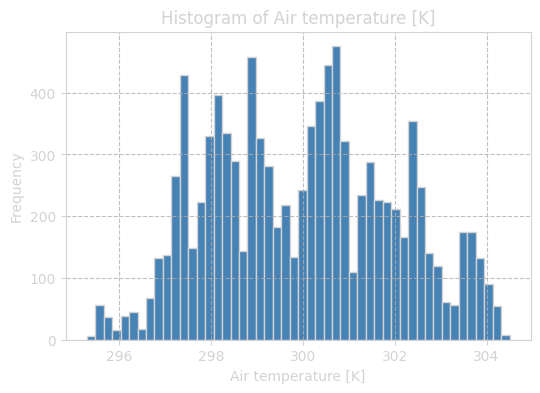

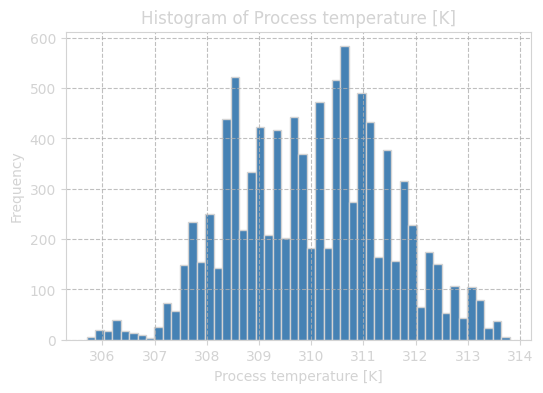

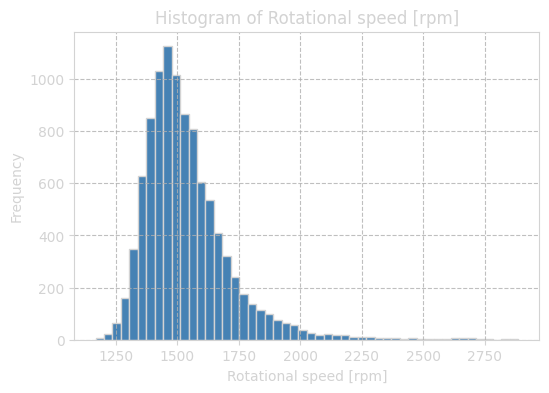

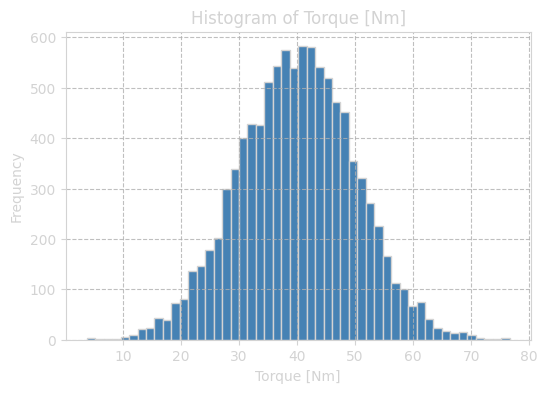

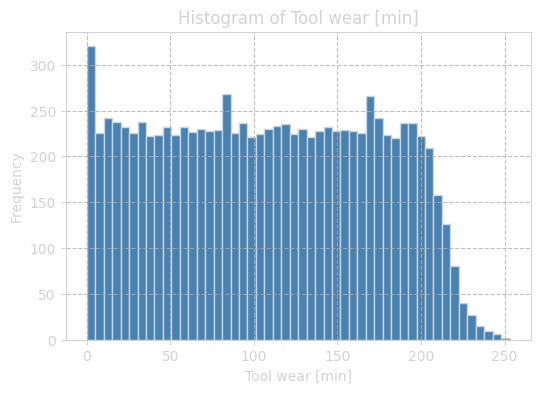

In [ ]:
#draw histograms
draw_histograms(df_maintenance, feature_cols)

In [ ]:
#skewness of the numeric variables
df_maintenance[num_cols].skew()

,0
Air temperature [K],0.114274
Process temperature [K],0.015027
Rotational speed [rpm],1.993171
Torque [Nm],-0.009517
Tool wear [min],0.027292


##  Charts and Graphs

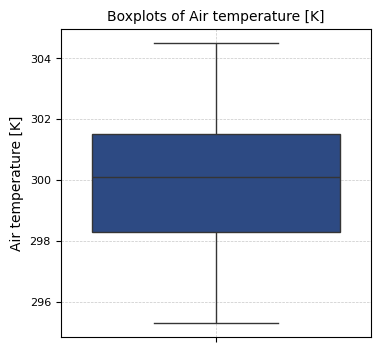

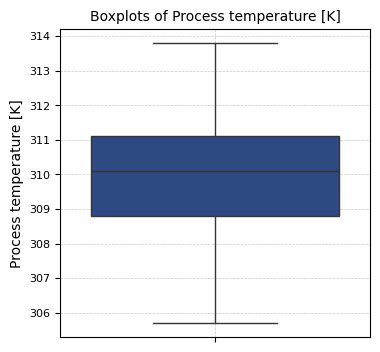

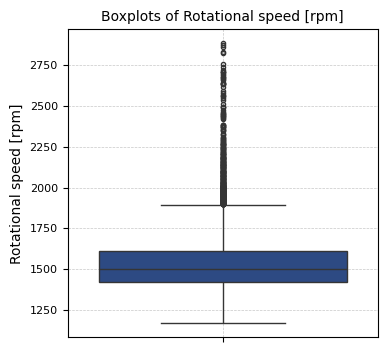

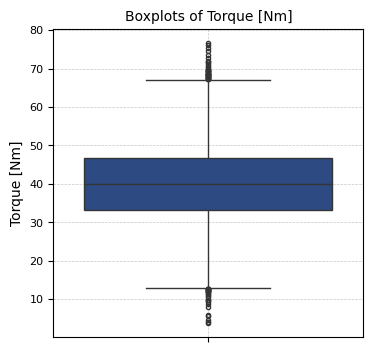

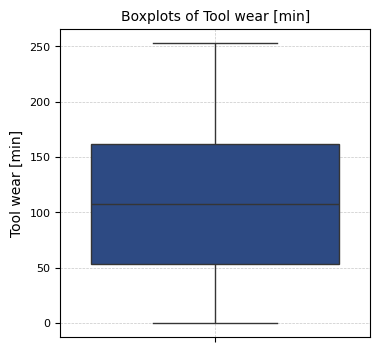

In [ ]:
#draw boxplot for the numeric variables
draw_boxplots(df_maintenance, num_cols)

In [ ]:
#value count for the categoric variables
for col in cat_cols:
  print(df_maintenance[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [ ]:
#correlation dataframe for the numeric variables
df_maintenance[num_cols].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


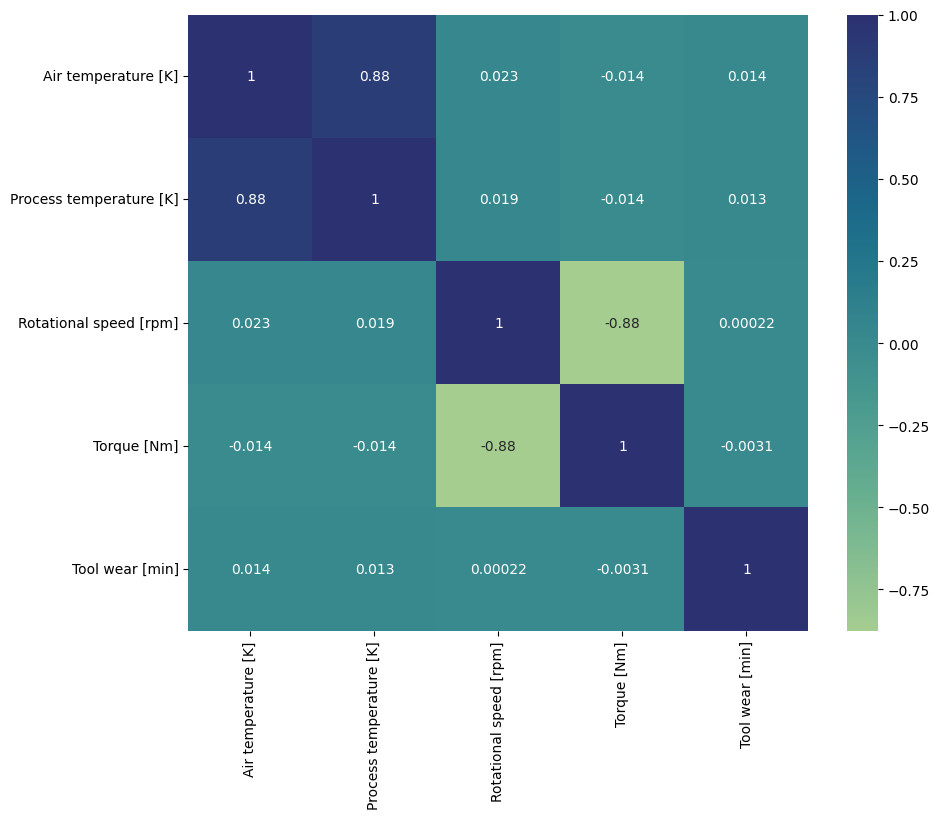

In [ ]:
#correlation heatmap for the numeric variables
draw_heatmap(df_maintenance[num_cols])

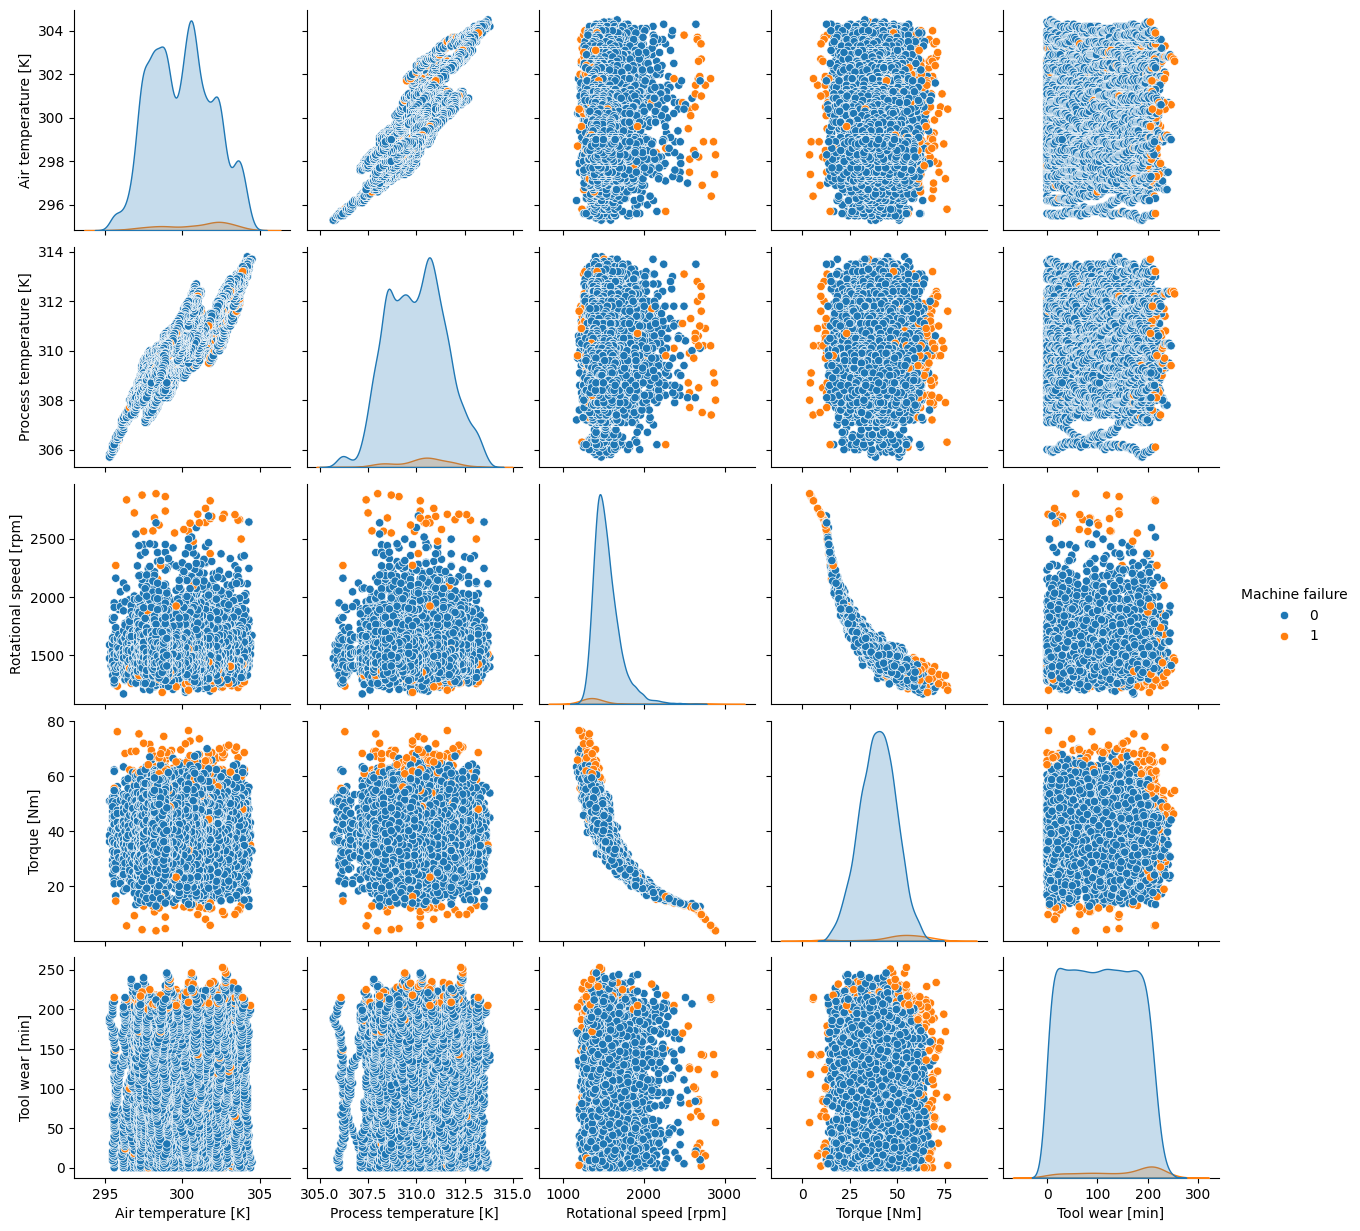

In [ ]:
#pairplot for the features with target(machine failure) division
draw_pairplot(features_target_df, target_col)

#yeni denemeler

<Figure size 800x500 with 0 Axes>

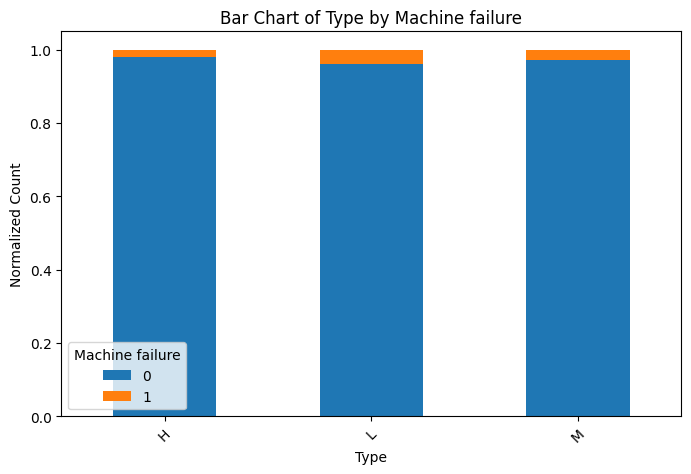

In [ ]:
plot_all_barcharts(features_target_df, hue=target_col, normalize=True, dimension=(8, 5))

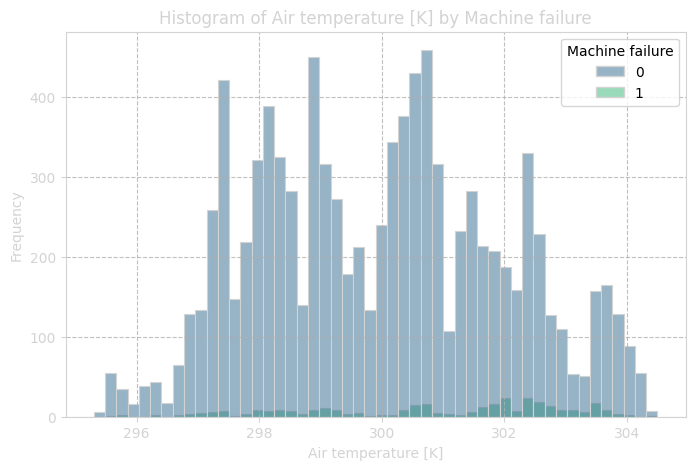

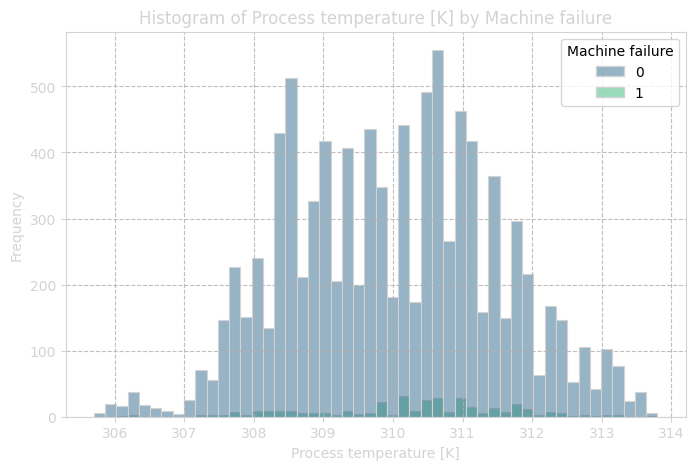

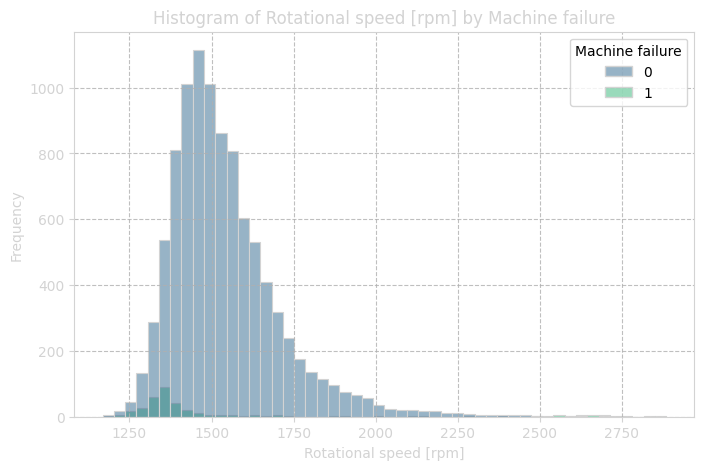

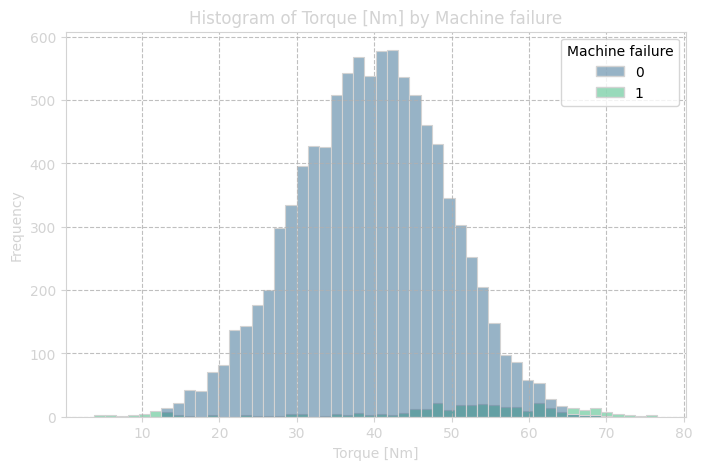

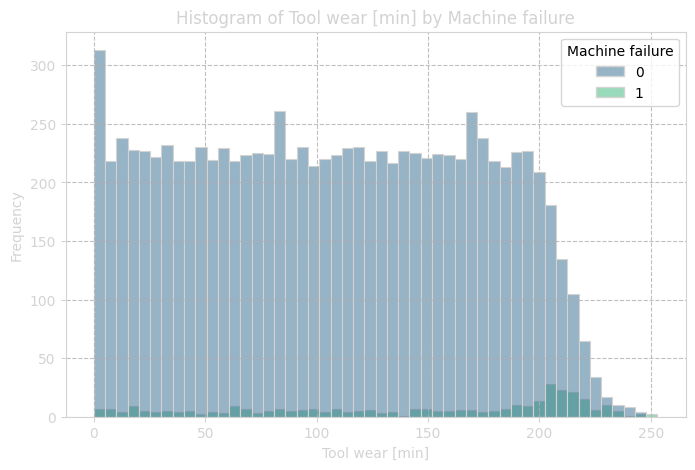

In [ ]:
draw_histograms(features_target_df, num_cols, hue=target_col, dimension=(8, 5))

Analyzing column: Type


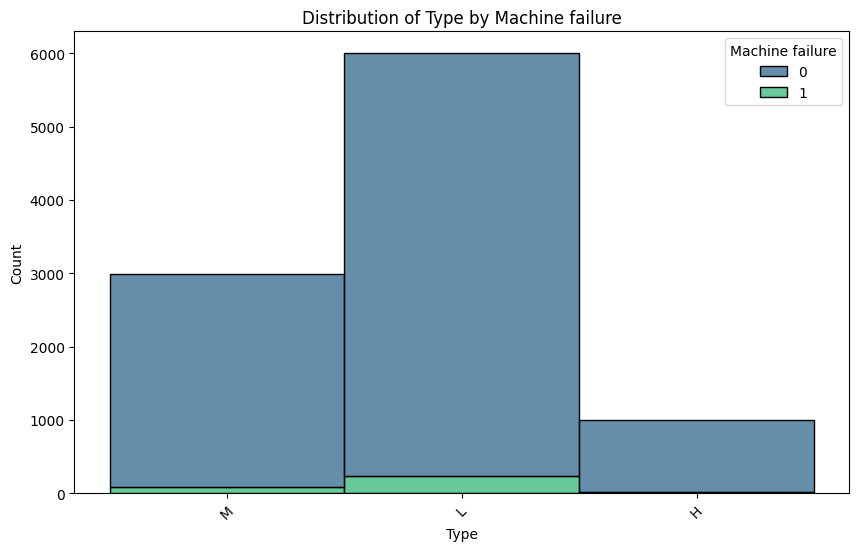

Value counts for Type by Machine failure:
Machine failure  Type
0                L       5765
                 M       2914
                 H        982
1                L        235
                 M         83
                 H         21
Name: count, dtype: int64



In [ ]:
plot_categorical_analysis(features_target_df, target_col=target_col)